<h1 align='center' style="color:green;">PyTorch 101</h1>

**Hi,** This notebook is about introduction to Pytorch and It covers PyTorch capabalities and Hands-on with PyTorch basics. I have covered the building block of PyTorch data type i.e Tensors and basics as well as advanced operations that we can perform on them.

In the intial sections I have covered basics of pytorch and it is all about to familiarize yourself with overall ecosystem of PyTorch and in later sections I have covered some advanced topics that includes matrix operations, datasets and dataloader and a neural network implementation for regression task.

After going through this notebook you will have fair idea about PyTorch's capabilities and its application in real world problems. You will be able to implement this awesome framework in your current setup or can write it from scratch.



This notebook is part of my repo `Master PyTorch` which coveres almost everything you need to know about PyTorch. This repo has projects from most of the ML/DL domains like from `Tabular` to `Images` and `Texts` data. 

**Contents**

- Introduction
- Tensors
- Tensor attributes
- Basic Operations on Tensors
- Advance Operations on Tensors
- Dataset and DataLoader
- Autograd
- Neural Networks

## Introduction

### What is PyTorch?


- PyTorch is a deep learning framework that offers a wide range of tools and libraries for easy and effective neural network implementation.

 - It has gained significant popularity and is widely used as an open-source framework. 

- PyTorch caters to various requirements, making it suitable for both straightforward and complex neural network tasks. 

- Primarily written in Python, it also provides support for multiple programming languages, including Java and C++.

-  For more info you can visit its official website <a href="https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html" target="blank">pytorch</a>

### Application of PyTorch

PyTorch has a wide range of applications across various fields:

- Image and Video Processing: PyTorch provides easy implimentations of CNNs which are quite useful for Image and Video related tasks.

- Natural Language Processing (NLP): PyTorch is employed in NLP tasks, including sentiment analysis, machine translation, text generation, named entity recognition, and question-answering systems.

- Time Series Analysis: PyTorch is applied in time series forecasting, anomaly detection, and sequence modeling tasks.

These are just a few examples of the diverse applications of PyTorch.

## Tensors

**What are Tensors?**

- Tensors are the fundamental blocks that carry information in our mathematical models, and they are composed using several operations to create mathematical graphs in which information can flow (propagate) forward (functional application) and backwards (using the chain rule). 

- Tensors are a specialized data structure that are very similar to arrays and matrices. 

- In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

**Side note**: what is a tensor __really__? 

- Tensors are important mathematical objects with applications in multiple domains in mathematics and physics. 
- The term "tensor" comes from the usage of these mathematical objects to describe the stretching of a volume of matter under *tension*. 
- They are central objects of study in a subfield of mathematics known as differential geometry, which deals with the geometry of continuous vector spaces.
-  As a very high-level summary (and as first approximation), tensors are defined as multi-linear "machines" that have a number of slots (their order, a.k.a. rank), taking a number of "column" vectors and "row" vectors *to produce a scalar*.
- For example, a tensor $\mathbf{A}$ (represented by a matrix with rows and columns that you could write on a sheet of paper) can be thought of having two slots. So when $\mathbf{A}$ acts upon a column vector $\mathbf{v}$ and a row vector $\mathbf{x}$, it returns a scalar:

$$\mathbf{A}(\mathbf{x}, \mathbf{v}) = s$$
    
If $\mathbf{A}$ only acts on the column vector, for example, the result will be another column tensor $\mathbf{u}$ of one order less than the order of $\mathbf{A}$. Thus, when $\mathbf{v}$ acts is similar to "removing" its slot: 

$$\mathbf{u} = \mathbf{A}(\mathbf{v})$$

The resulting $\mathbf{u}$ can later interact with another row vector to produce a scalar or be used in any other way. 

This can be a very powerful way of thinking about tensors, as their slots can guide you when writing code, especially given that PyTorch has a _functional_ approach to modules in which this view is very much highlighted. As we will see below, these simple equations above have a completely straightforward representation in the code. In the end, most of what our models will do is to process the input using this type of functional application so that we end up having a tensor output and a scalar value that measures how good our output is with respect to the real output value in the dataset.
    

**Difference between numpy's ndarray and Tensors**

- Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerator.
- Tensors are also optimized for automatic differentiation. 


### Imports

In [2]:
import torch
import numpy as np

**Side note**: why not `import pytorch`? The name of the package is `torch` for historical reasons: `torch` is the orginal name of the ancestor of the PyTorch library that got started back in 2002 as a C library with Lua scripting. It was only much later that the original `torch` was ported to Python. The PyTorch project decided to prefix the Py to make clear that this library refers to the Python version, as it was confusing back then to know which `torch` one was referring to. All the internal references to the library use just `torch`. It's possible that PyTorch will be renamed at some point, as the original `torch` is no longer maintained and there is no longer confusion.

We can see the version installed and determine whether or not we have a GPU-enabled PyTorch install by issuing

In [3]:
print("PyTorch version {}".format(torch.__version__))
print("GPU-enabled installation? {}".format(torch.cuda.is_available()))

PyTorch version 2.0.1
GPU-enabled installation? False


**Types of a Tensor**

Types of tensors:
    
- A scalar, a single number, is a zero-th order tensor.
    
- A column vector $v$ of dimensionality $d_c \times 1$ is a tensor of order 1.
    
- A row vector $x$ of dimensionality $1 \times d_r$ is a tensor of order 1.
    
- A matrix $A$ of dimensionality $d_r \times d_c$ is a tensor of order 2.
    
- A cube $T$ of dimensionality $d_r \times d_c \times d_d$ is a tensor of order 3. 


### Initializing a Tensor

Tensor can be initialized into several ways.

Let's get started with tensors in PyTorch. The framework supports eight different types ([Lapan 2018](#References)):

- 3 float types (16-bit, 32-bit, 64-bit): `torch.FloatTensor` is the class name for the commonly used 32-bit tensor.
- 5 integer types (signed 8-bit, unsigned 8-bit, 16-bit, 32-bit, 64-bit): common tensors of these types are the 8-bit unsigned tensor `torch.ByteTensor` and the 64-bit `torch.LongTensor`.

There are three fundamental ways to create tensors in PyTorch ([Lapan 2018](#References)):

- Call a tensor constructor of a given type, which will create a non-initialized tensor. So we then need to fill this tensor later to be able to use it.
- Call a built-in method in the `torch` module that returns a tensor that is already initialized.
- Use the PyTorch–NumPy bridge.

**From python list**

In [2]:
arr = [[1, 2, 3], [4, 5, 6]]

arr_t = torch.tensor(arr)
arr_t

tensor([[1, 2, 3],
        [4, 5, 6]])

In [9]:
#we can also specify the data type
arr = [[1, 2, 3], [4, 5, 6]]

arr_t = torch.tensor(arr, dtype=torch.float32)
arr_t

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [12]:
#alternate way Tensor -> Float Tensor
arr = [[1, 2, 3], [4, 5, 6]]

arr_t = torch.Tensor(arr)
arr_t

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [13]:
arr = [[1, 2, 3], [4, 5, 6]]

arr_t = torch.LongTensor(arr)
arr_t

tensor([[1, 2, 3],
        [4, 5, 6]])

**From numpy array**

In [5]:
arr = np.array([1,2,3,4,5])
print(arr)
x = torch.from_numpy(arr)
print(x)

[1 2 3 4 5]
tensor([1, 2, 3, 4, 5])


**From another tensor**

In [8]:
arr = np.array([1,2,3,4,5])
print(arr)
x = torch.from_numpy(arr)
print(x)
#will create a tensor of ones with same dimension of x
ones = torch.ones_like(x)
print(ones)

[1 2 3 4 5]
tensor([1, 2, 3, 4, 5])
tensor([1, 1, 1, 1, 1])


**With random or constant values**

- <a href='https://pytorch.org/docs/stable/torch.html#torch.rand'><strong><tt>torch.rand(size)</tt></strong></a> returns random samples from a uniform distribution over [0, 1)<br>
- <a href='https://pytorch.org/docs/stable/torch.html#torch.randn'><strong><tt>torch.randn(size)</tt></strong></a> returns samples from the "standard normal" distribution [σ = 1]<br>
&nbsp;&nbsp;&nbsp;&nbsp;Unlike <tt>rand</tt> which is uniform, values closer to zero are more likely to appear.<br>
- <a href='https://pytorch.org/docs/stable/torch.html#torch.randint'><strong><tt>torch.randint(low,high,size)</tt></strong></a> returns random integers from low (inclusive) to high (exclusive)

**Examples**

In [24]:
x_u = torch.rand(4, 3)
x_n = torch.randn(4, 3)
x_int = torch.randint(1, 6, (3, 4))

print(f"Random tensors from uniform distribution : \n {x_u}\n")
print(f"Random tensors from normal distribution : \n {x_n}\n")
print(f"Random tensors between two integers : \n {x_int}\n")

Random tensors from uniform distribution : 
 tensor([[0.7758, 0.7918, 0.3429],
        [0.9486, 0.9792, 0.3797],
        [0.4408, 0.6230, 0.8413],
        [0.3331, 0.2486, 0.5846]])

Random tensors from normal distribution : 
 tensor([[-1.6670,  0.5261,  0.1993],
        [-1.7312, -0.7829, -0.5817],
        [-0.6793,  2.9097,  0.5095],
        [ 0.4781,  0.2146, -0.7231]])

Random tensors between two integers : 
 tensor([[4, 5, 1, 3],
        [4, 4, 4, 2],
        [1, 5, 4, 1]])



**Random number tensors that follow input size**

<a href='https://pytorch.org/docs/stable/torch.html#torch.rand_like'><strong><tt>torch.rand_like(input)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.randn_like'><strong><tt>torch.randn_like(input)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.randint_like'><strong><tt>torch.randint_like(input,low,high)</tt></strong></a><br> 
<a href='https://pytorch.org/docs/stable/torch.html#torch.zeros_like'><strong><tt>torch.zeros_like(input)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.ones_like'><strong><tt>torch.ones_like(input)</tt></strong></a><br>

these return random number tensors with the same size as <tt>input</tt>

**Examples**

In [25]:
x = torch.zeros(2,5)
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [26]:
#tensor of same shape of x but from uniform distribution
u_t = torch.rand_like(x)
u_t

tensor([[0.1073, 0.9458, 0.7245, 0.0866, 0.4241],
        [0.7996, 0.3360, 0.3151, 0.2148, 0.9967]])

In [27]:
#tensor of same shape of x but from normal distribution
n_t = torch.randn_like(x)
n_t

tensor([[-0.2965, -0.1857, -1.2174, -0.2693,  1.4423],
        [-1.4133,  0.1271, -0.7063, -2.3060,  0.0129]])

In [28]:
#tensor of same shape of x but intergers between two numbers
n_t = torch.randint_like(x, 10, 30)
n_t

tensor([[27., 22., 17., 17., 29.],
        [13., 23., 25., 28., 24.]])

In [29]:
#tensor of same shape of x but all ones
o_t = torch.ones_like(x)
o_t

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [30]:
#tensor of same shape of x but all zeros
o_t = torch.zeros_like(x)
o_t

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

### Tensor Datatypes

<table style="display: inline-block">
<tr><th>TYPE</th><th>NAME</th><th>EQUIVALENT</th><th>TENSOR TYPE</th></tr>
<tr><td>32-bit integer (signed)</td><td>torch.int32</td><td>torch.int</td><td>IntTensor</td></tr>
<tr><td>64-bit integer (signed)</td><td>torch.int64</td><td>torch.long</td><td>LongTensor</td></tr>
<tr><td>16-bit integer (signed)</td><td>torch.int16</td><td>torch.short</td><td>ShortTensor</td></tr>
<tr><td>32-bit floating point</td><td>torch.float32</td><td>torch.float</td><td>FloatTensor</td></tr>
<tr><td>64-bit floating point</td><td>torch.float64</td><td>torch.double</td><td>DoubleTensor</td></tr>
<tr><td>16-bit floating point</td><td>torch.float16</td><td>torch.half</td><td>HalfTensor</td></tr>
<tr><td>8-bit integer (signed)</td><td>torch.int8</td><td></td><td>CharTensor</td></tr>
<tr><td>8-bit integer (unsigned)</td><td>torch.uint8</td><td></td><td>ByteTensor</td></tr></table>

<a href='https://pytorch.org/docs/stable/tensors.html'>Tensor Datatypes</a>

### Copying vs. sharing

- <a href='https://pytorch.org/docs/stable/torch.html#torch.from_numpy'><strong><tt>torch.from_numpy()</tt></strong></a><br>
- <a href='https://pytorch.org/docs/stable/torch.html#torch.as_tensor'><strong><tt>torch.as_tensor()</tt></strong></a><br>
- <a href='https://pytorch.org/docs/stable/torch.html#torch.tensor'><strong><tt>torch.tensor()</tt></strong></a><br>

There are a number of different functions available for <a href='https://pytorch.org/docs/stable/torch.html#creation-ops'>creating tensors</a>. When using <a href='https://pytorch.org/docs/stable/torch.html#torch.from_numpy'><strong><tt>torch.from_numpy()</tt></strong></a> and <a href='https://pytorch.org/docs/stable/torch.html#torch.as_tensor'><strong><tt>torch.as_tensor()</tt></strong></a>, the PyTorch tensor and the source NumPy array share the same memory. This means that changes to one affect the other. However, the <a href='https://pytorch.org/docs/stable/torch.html#torch.tensor'><strong><tt>torch.tensor()</tt></strong></a> function always makes a copy.

**Examples**

In [17]:
arr = np.array([4, 7, 9])

t1 = torch.from_numpy(arr)
t2 = torch.tensor(arr)

print(f"Using from_numpy \n {t1}")
print(f"Using torch.tensor \n {t2}")

Using from_numpy 
 tensor([4, 7, 9])
Using torch.tensor 
 tensor([4, 7, 9])


The `from_numpy()` method is depecrated in favor of `tensor()`, which is a more capable method in the torch package. `from_numpy()` is only there for backwards compatibility. It can be a little bit quirky, so I recommend using the newer method in PyTorch >= 0.4.

In [18]:
#now modify the numpy array
arr[0] = 99

print(f"Using from_numpy \n {t1}")
print(f"Using torch.tensor \n {t2}")

Using from_numpy 
 tensor([99,  7,  9])
Using torch.tensor 
 tensor([4, 7, 9])


"t1" which was created using *torch.from_numpy* got changed when we modified the underlying numpy array but "t2" remained same.

### Class constructors
- <a href='https://pytorch.org/docs/stable/tensors.html'><strong><tt>torch.Tensor()</tt></strong></a><br>
- <a href='https://pytorch.org/docs/stable/tensors.html'><strong><tt>torch.FloatTensor()</tt></strong></a><br>
- <a href='https://pytorch.org/docs/stable/tensors.html'><strong><tt>torch.LongTensor()</tt></strong></a>
<br>

Note :

- There's a subtle difference between using the factory function <font color=green><tt>torch.tensor(data)</tt></font> and the class constructor <font color=green><tt>torch.Tensor(data)</tt></font>.<br>
- The factory function determines the dtype from the incoming data, or from a passed-in dtype argument.<br>
- The class constructor <tt>torch.Tensor()</tt>is simply an alias for <tt>torch.FloatTensor(data)</tt>

Note that we specified the dimensions as the arguments to the constructor by passing the numbers directly – and not a list or a tuple, which would have very different outcomes as we will see below! We can always inspect the size of the tensor using the `size()` method.

The constructor method allocates space in memory for this tensor. However, the tensor is *non-initialized*. In order to initialize it, we need to call any of the tensor initialization methods of the basic tensor types. For example, the tensor we just created has a built-in method `zero_()`:

**Examples**

In [20]:
data = np.array([1,2,3])

a = torch.Tensor(data)  # Equivalent to cc = torch.FloatTensor(data)
print(a, a.type())

c = torch.FloatTensor(data)
print(c, c.type())

b = torch.tensor(data)
print(b, b.type())

tensor([1., 2., 3.]) torch.FloatTensor
tensor([1., 2., 3.]) torch.FloatTensor
tensor([1, 2, 3]) torch.LongTensor


In [4]:
t = torch.FloatTensor(2, 3)
print(t)
print(t.size())

tensor([[0., 0., 0.],
        [0., 0., 0.]])
torch.Size([2, 3])


In [8]:
t.zero_()

tensor([[0., 0., 0.],
        [0., 0., 0.]])

The underscore after the method name is important: it means that the operation happens _in place_: the returned object is the same object but now with different content. A very handy way to construct a tensor using the constructor happens when we have available the content we want to put in the tensor in the form of a Python iterable. In this case, we just pass it as the argument to the constructor:

**We now see emerging two important paradigms in PyTorch.** 
- The _imperative_ approach to performing operations, using _inplace_ methods, is in marked contrast with an additional paradigm also used in PyTorch
- The _functional_ approach, where the returned object is a copy of the original object. 

Both paradigms have their specific use cases as we will be seeing below. 

**The rule of thumb** is that _inplace_ methods are faster and don't require extra memory allocation in general, but they can be tricky to understand (keep this in mind regarding the computational graph that we will see below). _Functional_ methods make the code referentially transparent, which is a highly desired property that makes it easier to understand the underlying math, but we rely on the efficiency of the implementation:

In [9]:
# creates a new copy of the tensor that is still linked to
# the computational graph (see below)
t1 = torch.clone(t)
assert id(t) != id(t1), 'Functional methods create a new copy of the tensor'

# To create a new _independent_ copy, we do need to detach
# from the graph
t1 = torch.clone(t).detach()

## Attributes of Tensors

- Shape
- Size
- device
- layout

**Shape**

In [31]:
data = np.array([1,2,3])
a = torch.Tensor(data) 

In [32]:
a.shape

torch.Size([3])

In [38]:
a.size(0)

3

**device**

- PyTorch supports use of multiple <a href='https://pytorch.org/docs/stable/tensor_attributes.html#torch-device'>devices</a>, harnessing the power of one or more GPUs in addition to the CPU. 
- Operations between tensors can only happen for tensors installed on the `same device`.

In [39]:
a.device

device(type='cpu')

**layout**

PyTorch has a class to hold the <a href='https://pytorch.org/docs/stable/tensor_attributes.html#torch.torch.layout'>memory layout</a> option. The default setting is <a href='https://en.wikipedia.org/wiki/Stride_of_an_array'>strided</a> .

In [41]:
a.layout

torch.strided

## Basic Operations on Tensors

* Indexing and slicing
* Type Conversion
* Reshaping tensors (tensor views)
* Tensor arithmetic and basic operations
* Dot products
* Matrix multiplication

**Indexing and Slicing**

Extracting specific values from a tensor works just the same as with NumPy arrays<br>
<img src='../Images/arrayslicing.png' width="500" style="display: inline-block"><br><br>
Image source: http://www.scipy-lectures.org/_images/numpy_indexing.png

In [10]:
x = torch.arange(6).reshape(3,2)
print(x)

tensor([[0, 1],
        [2, 3],
        [4, 5]])


In [11]:
# Grabbing the right hand column values
x[:,1]

tensor([1, 3, 5])

In [12]:
# Grabbing the right hand column as a (3,1) slice
x[:,1:]

tensor([[1],
        [3],
        [5]])

In [13]:
# Grabbing the left hand column as a (3,1) slice
x[:, 0]

tensor([0, 2, 4])

PyTorch also supports indexing using long tensors, for example:

In [14]:
i = torch.tensor([0, 1])
j = torch.tensor([0, 1])

x[i, j]


tensor([0, 3])

**Type Conversion**

Each tensor has a set of convenient methods to convert types. For example, if we want to convert the tensor above to a 32-bit float tensor, we use the method `.float()`:

In [15]:
t = t.float()   # converts to 32-bit float
print(t)
t = t.double()  # converts to 64-bit float
print(t)
t = t.byte()    # converts to unsigned 8-bit integer
print(t)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)
tensor([[0, 0, 0],
        [0, 0, 0]], dtype=torch.uint8)


**Reshaping tensors**

<a href='https://pytorch.org/docs/master/tensors.html#torch.Tensor.view'><strong><tt>view()</tt></strong></a> and <a href='https://pytorch.org/docs/master/torch.html#torch.reshape'><strong><tt>reshape()</tt></strong></a> do essentially the same thing by returning a reshaped tensor without changing the original tensor in place.<br>
There's a good discussion of the differences <a href='https://stackoverflow.com/questions/49643225/whats-the-difference-between-reshape-and-view-in-pytorch'>here</a>.


In [13]:
x = torch.randn((4, 3))
print(x)

tensor([[ 0.8595,  2.1165,  0.4684],
        [ 0.1508, -0.7908,  0.1327],
        [ 0.2961, -0.7076, -0.1124],
        [ 0.5378, -0.0915,  2.2167]])


In [14]:
#shape 6, 2
x_v = x.view(6, 2)
x_v

tensor([[ 0.8595,  2.1165],
        [ 0.4684,  0.1508],
        [-0.7908,  0.1327],
        [ 0.2961, -0.7076],
        [-0.1124,  0.5378],
        [-0.0915,  2.2167]])

*Note : Views reflect the most current data*

In [16]:
#for example
x[0][0] = 101

x_v

tensor([[ 1.0100e+02,  2.1165e+00],
        [ 4.6843e-01,  1.5078e-01],
        [-7.9075e-01,  1.3271e-01],
        [ 2.9611e-01, -7.0765e-01],
        [-1.1242e-01,  5.3781e-01],
        [-9.1452e-02,  2.2167e+00]])

*Note : Reshape also do same thing as view but torch.view can only operate on contiguous tensors, while torch.reshape can operate on both*

In [23]:
x = torch.randn((4, 3))
print(x)

tensor([[ 1.0111, -0.4208, -0.2684],
        [-0.2729, -1.0976, -0.8959],
        [ 0.5108, -0.1508,  0.5257],
        [ 0.3561, -0.5570, -0.6945]])


In [24]:
x_r = x.reshape((3, 4))
x_r

tensor([[ 1.0111, -0.4208, -0.2684, -0.2729],
        [-1.0976, -0.8959,  0.5108, -0.1508],
        [ 0.5257,  0.3561, -0.5570, -0.6945]])

In [25]:
#now change the first element of x
x[0][0] = -200

print(f"Reshaped tensor {x_r}")



Reshaped tensor tensor([[-2.0000e+02, -4.2084e-01, -2.6841e-01, -2.7288e-01],
        [-1.0976e+00, -8.9587e-01,  5.1079e-01, -1.5077e-01],
        [ 5.2568e-01,  3.5605e-01, -5.5703e-01, -6.9453e-01]])


**Infering correct size**

By passing in <tt>-1</tt> PyTorch will infer the correct value from the given tensor

In [26]:
x = torch.randn((4, 3))
print(x)


tensor([[ 0.8124,  0.2746, -1.3164],
        [-0.1530,  0.4343,  0.2952],
        [-0.0430, -0.1117,  0.0517],
        [ 0.0852,  0.0904,  0.5756]])


In [27]:
#flatten x
x_flatten = x.view(-1)
print(x_flatten)

tensor([ 0.8124,  0.2746, -1.3164, -0.1530,  0.4343,  0.2952, -0.0430, -0.1117,
         0.0517,  0.0852,  0.0904,  0.5756])


In [29]:
#flatten x
x_reshaped = x.view(-1, 4)
print(x_reshaped)

tensor([[ 0.8124,  0.2746, -1.3164, -0.1530],
        [ 0.4343,  0.2952, -0.0430, -0.1117],
        [ 0.0517,  0.0852,  0.0904,  0.5756]])


`-1` input of `view()` in above operation got value of `3`

**Adopt another tensor's shape with <tt>.view_as()</tt>**

<a href='https://pytorch.org/docs/master/tensors.html#torch.Tensor.view_as'><strong><tt>view_as(input)</tt></strong></a> only works with tensors that have the same number of elements.

In [32]:
x = torch.randint(low = 10, high=20, size=(4, 5))

z = torch.randint(0, 10, (20,))

In [33]:
#view z as x
z.view_as(x)

tensor([[3, 1, 0, 9, 5],
        [1, 7, 9, 9, 0],
        [3, 5, 8, 2, 3],
        [4, 9, 0, 8, 9]])

So it reshaped `z` into share of input tensor `x`

**Tensor Arithmetic**

- Addition
- Substraction
- Dot products
- Matrix multiplication
- Broadcasting



*Addition*

In [34]:
a = torch.tensor([1,2,3], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)


In [36]:
print(a+b)

tensor([-3., -3., -3.])


Addition is happening elementwise. We can also use `torch.add(a, b)` for addition.

In [42]:
s = torch.add(a, b)
print(s)

tensor([5., 7., 9.])


*Substraction*

In [37]:
a = torch.tensor([1,2,3], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)


In [38]:
print(b-a)

tensor([3., 3., 3.])


Same as addition. `torch.substract(a, b)` can also be used for same purpose.

In [43]:
d = torch.subtract(b, a)
print(d)

tensor([3., 3., 3.])


We can also use a dummy tensor in `torch.add()` method to get the output of the resultant addition.

In [47]:
a = torch.randint(1, 5, (5,))
b = torch.randint(10, 15, (5,))

#create a dummy variable of same size of a
dummy = torch.empty((5,))
torch.add(a, b, out=dummy)

print(dummy)


tensor([13., 17., 11., 12., 13.])


*Changing a tensor in-place*

In [49]:
a = torch.randint(1, 5, (5,))
b = torch.randint(10, 15, (5,))

a.add_(b) # equivalent to a=torch.add(a,b)

print(a)

tensor([15, 13, 15, 15, 14])


<div class="alert alert-info"><strong>NOTE:</strong> Any operation that changes a tensor in-place is post-fixed with an underscore _.
    <br>In the above example: <tt>a.add_(b)</tt> changed <tt>a</tt>.</div>

#### Basic Tensor Operations
<table style="display: inline-block">
<caption style="text-align: center"><strong>Arithmetic</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>a + b</td><td>a.add(b)</td><td>element wise addition</td></tr>
<tr><td>a - b</td><td>a.sub(b)</td><td>subtraction</td></tr>
<tr><td>a * b</td><td>a.mul(b)</td><td>multiplication</td></tr>
<tr><td>a / b</td><td>a.div(b)</td><td>division</td></tr>
<tr><td>a % b</td><td>a.fmod(b)</td><td>modulo (remainder after division)</td></tr>
<tr><td>a<sup>b</sup></td><td>a.pow(b)</td><td>power</td></tr>
</table>

<table style="display: inline-block">
<caption style="text-align: center"><strong>Trigonometry</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>sin(a)</td><td>torch.sin(a)</td><td>sine</td></tr>
<tr><td>cos(a)</td><td>torch.sin(a)</td><td>cosine</td></tr>
<tr><td>tan(a)</td><td>torch.sin(a)</td><td>tangent</td></tr>
<tr><td>arcsin(a)</td><td>torch.asin(a)</td><td>arc sine</td></tr>
<tr><td>arccos(a)</td><td>torch.acos(a)</td><td>arc cosine</td></tr>
<tr><td>arctan(a)</td><td>torch.atan(a)</td><td>arc tangent</td></tr>
<tr><td>sinh(a)</td><td>torch.sinh(a)</td><td>hyperbolic sine</td></tr>
<tr><td>cosh(a)</td><td>torch.cosh(a)</td><td>hyperbolic cosine</td></tr>
<tr><td>tanh(a)</td><td>torch.tanh(a)</td><td>hyperbolic tangent</td></tr>
</table>

<table style="display: inline-block">
<caption style="text-align: center"><strong>Summary Statistics</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>$\sum a$</td><td>torch.sum(a)</td><td>sum</td></tr>
<tr><td>$\bar a$</td><td>torch.mean(a)</td><td>mean</td></tr>
<tr><td>a<sub>max</sub></td><td>torch.max(a)</td><td>maximum</td></tr>
<tr><td>a<sub>min</sub></td><td>torch.min(a)</td><td>minimum</td></tr>
<tr><td colspan="3">torch.max(a,b) returns a tensor of size a<br>containing the element wise max between a and b</td></tr>
</table>

<div class="alert alert-info"><strong>NOTE:</strong> Most arithmetic operations require float values. Those that do work with integers return integer tensors.<br>
For example, <tt>torch.div(a,b)</tt> performs floor division (truncates the decimal) for integer types, and classic division for floats.</div>

In [50]:
a = torch.tensor([1,2,3], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)
print(torch.add(a,b).sum())

tensor(21.)


In [51]:
print(torch.max(a,b))

tensor([4., 5., 6.])


`torch.max(a,b)` returns a tensor of size a containing the element wise max between a and b

**Dot products**

A <a href='https://en.wikipedia.org/wiki/Dot_product'>dot product</a> is the sum of the products of the corresponding entries of two 1D tensors. If the tensors are both vectors, the dot product is given as:<br>

$\begin{bmatrix} a & b & c \end{bmatrix} \;\cdot\; \begin{bmatrix} d & e & f \end{bmatrix} = ad + be + cf$

If the tensors include a column vector, then the dot product is the sum of the result of the multiplied matrices. For example:<br>
$\begin{bmatrix} a & b & c \end{bmatrix} \;\cdot\; \begin{bmatrix} d \\ e \\ f \end{bmatrix} = ad + be + cf$<br><br>
Dot products can be expressed as <a href='https://pytorch.org/docs/stable/torch.html#torch.dot'><strong><tt>torch.dot(a,b)</tt></strong></a> or `a.dot(b)` or `b.dot(a)`

In [57]:
a = torch.tensor([1,2,3], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)
a, b

(tensor([1., 2., 3.]), tensor([4., 5., 6.]))

In [58]:
a_dot_b = torch.dot(a, b)

print(a_dot_b)

tensor(32.)


<div class="alert alert-info"><strong>NOTE:</strong> There's a slight difference between <tt>torch.dot()</tt> and <tt>numpy.dot()</tt>. While <tt>torch.dot()</tt> only accepts 1D arguments and returns a dot product, <tt>numpy.dot()</tt> also accepts 2D arguments and performs matrix multiplication</div>

**Matrix multiplication**

2D <a href='https://en.wikipedia.org/wiki/Matrix_multiplication'>Matrix multiplication</a> is possible when the number of columns in tensor <strong><tt>A</tt></strong> matches the number of rows in tensor <strong><tt>B</tt></strong>. In this case, the product of tensor <strong><tt>A</tt></strong> with size $(x,y)$ and tensor <strong><tt>B</tt></strong> with size $(y,z)$ results in a tensor of size $(x,z)$
<div>
<div align="left"><img src='../Images/Matrix_multiplication_diagram.png' align="left"><br><br>

$\begin{bmatrix} a & b & c \\
d & e & f \end{bmatrix} \;\times\; \begin{bmatrix} m & n \\ p & q \\ r & s \end{bmatrix} = \begin{bmatrix} (am+bp+cr) & (an+bq+cs) \\
(dm+ep+fr) & (dn+eq+fs) \end{bmatrix}$</div></div>

<div style="clear:both">Image source: <a href='https://commons.wikimedia.org/wiki/File:Matrix_multiplication_diagram_2.svg'>https://commons.wikimedia.org/wiki/File:Matrix_multiplication_diagram_2.svg</a></div>

Matrix multiplication can be computed using <a href='https://pytorch.org/docs/stable/torch.html#torch.mm'><strong><tt>torch.mm(a,b)</tt></strong></a> or `a.mm(b)` or `a @ b` or `a.matmul(b)`


In [59]:
a = torch.tensor([[0,2,4],[1,3,5]], dtype=torch.float)
b = torch.tensor([[6,7],[8,9],[10,11]], dtype=torch.float)

print('a: ',a.size())
print('b: ',b.size())
print('a x b: ',torch.mm(a,b).size())

a:  torch.Size([2, 3])
b:  torch.Size([3, 2])
a x b:  torch.Size([2, 2])


In [63]:
#matrix multiplications
c = torch.matmul(a, b)
c1 = a @ b
c2 = a.matmul(b)
c, c1, c2

(tensor([[56., 62.],
         [80., 89.]]),
 tensor([[56., 62.],
         [80., 89.]]),
 tensor([[56., 62.],
         [80., 89.]]))

Note that `torch.mm` can not be used in case we need broadcasting

**Matrix multiplication with broadcasting**

Matrix multiplication that involves <a href='https://pytorch.org/docs/stable/notes/broadcasting.html#broadcasting-semantics'>broadcasting</a> can be computed using <a href='https://pytorch.org/docs/stable/torch.html#torch.matmul'><strong><tt>torch.matmul(a,b)</tt></strong></a> or `a.matmul(b)` or `a @ b`

In [64]:
t1 = torch.randn(2, 3, 4)
t2 = torch.randn(4, 5)
print(t1)
print(t2)
print(torch.matmul(t1, t2).size())

tensor([[[ 0.6263, -0.4267,  1.6157,  0.7315],
         [-1.1204, -1.7563, -0.2813, -0.6717],
         [-1.2577, -0.7797, -0.1162, -0.9286]],

        [[ 1.4452, -0.9090, -0.2240, -0.0716],
         [ 0.1560, -0.3195,  0.5765, -0.0261],
         [-0.1909, -0.3241,  1.1457, -0.1089]]])
tensor([[-0.3800,  2.9753, -0.9240,  0.6155,  0.3324],
        [ 1.0023, -0.5933,  1.1221, -0.2481, -1.2043],
        [ 0.8274, -1.5916, -1.0329, -0.3710, -0.6825],
        [ 1.1768,  1.5561, -0.5304, -0.1461,  1.3011]])
torch.Size([2, 3, 5])


However, the same operation raises a <tt><strong>RuntimeError</strong></tt> with <tt>torch.mm()</tt>:

In [65]:
print(torch.mm(t1, t2).size())

RuntimeError: self must be a matrix

## Advance operations over Tensors

**L2 or Euclidian Norm**

See <a href='https://pytorch.org/docs/stable/torch.html#torch.norm'><strong><tt>torch.norm()</tt></strong></a>

The <a href='https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm'>Euclidian Norm</a> gives the vector norm of $x$ where $x=(x_1,x_2,...,x_n)$.<br>
It is calculated as<br>

${\displaystyle \left\|{\boldsymbol {x}}\right\|_{2}:={\sqrt {x_{1}^{2}+\cdots +x_{n}^{2}}}}$


When applied to a matrix, <tt>torch.norm()</tt> returns the <a href='https://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm'>Frobenius norm</a> by default.

In [67]:
x = torch.tensor([2.,5.,8.,14.])
x.norm()

tensor(17.)

**Number of elements**

See <a href='https://pytorch.org/docs/stable/torch.html#torch.numel'><strong><tt>torch.numel()</tt></strong></a>

Returns the number of elements in a tensor.


In [71]:
z = torch.randint(low=1, high=20, size=(4, 5))
print(f"z : {z}")

print(f"Total Number of elements in z are : {z.numel()}")

z : tensor([[13, 13, 17,  9,  6],
        [ 9, 17, 17,  3,  6],
        [18,  6, 15,  1,  2],
        [10,  6,  3,  6, 17]])
Total Number of elements in z are : 20


## GPU computation

- Deep Learning frameworks take advantage of the powerful computational capabilities of modern graphic processing units (GPUs). GPUs were originally designed to perform frequent operations for graphics very efficiently and fast, such as linear algebra operations, which makes them ideal for our interests. 
- PyTorch makes it very easy to use the GPU: 
    - the common scenario is to tell the framework that we want to instantiate a tensor with a type that makes it a GPU tensor
    -  or move a given CPU tensor to the GPU. All the tensors that we have seen above are CPU tensors, and PyTorch has the counterparts for GPU tensors in the `torch.cuda` module. Let's see how this works.

In [16]:
try:
    t_gpu = torch.cuda.FloatTensor(3, 3)   # creation of a GPU tensor
    t_gpu.zero_()                          # initialization to zero
except TypeError as err:
    print(err)

type torch.cuda.FloatTensor not available. Torch not compiled with CUDA enabled.


However, a more common approach that gives us flexibility is through the use of devices.

A device in PyTorch refers to either the CPU (indicated by the string "cpu") or one of the possible GPU cards in the machine (indicated by the string "cuda:$n$", where $n$ is the index of the card). 

Let's create a random gaussian matrix using a method from the `torch` package, and set the computational device to be the GPU by specifying the `device` to be `cuda:0`, the first GPU card in our machine (this code will fail if you don't have a GPU, but we will work around that below): 

In [17]:
try:
    t_gpu = torch.randn(3, 3, device="cuda:0")
except AssertionError as err:
    print(err)
    t_gpu = None

t_gpu

Torch not compiled with CUDA enabled


As you can notice, the tensor now has the explicit device set to be a CUDA device, not a CPU device. Let's now create a tensor in the CPU and move it to the GPU:

In [18]:
# we could also state explicitly the device to be the
# CPU with torch.randn(3,3,device="cpu")
t = torch.randn(3, 3)
t

tensor([[ 0.6876,  0.1021,  0.0404],
        [ 0.5393, -0.5799,  1.3055],
        [-2.2185, -1.0130,  0.9707]])

In this case, the device is the CPU, but PyTorch does not explicitly say that given that this is the default behavior. To copy the tensor to the GPU we use the `.to()` method that every tensor implements, passing the device as an argument. This method creates a copy in the specified device or, if the tensor already resides in that device, it returns the original tensor ([Lapan 2018](#References)): 

In [19]:
try:
    t_gpu = t.to("cuda:0")  # copies the tensor from CPU to GPU
    # note that if we do now t_to_gpu.to("cuda:0") it will
    # return the same tensor without doing anything else
    # as this tensor already resides on the GPU
    print(t_gpu)
    print(t_gpu.device)
except AssertionError as err:
    print(err)

Torch not compiled with CUDA enabled


**Tip**: When we program PyTorch models, we will have to specify the device in several places (not so many, but definitely more than once). A good practice that is consistent accross the implementation and makes the code more portable is to declare early in the code a device variable by querying the framework if there is a GPU available that we can use. We can do this by writing

In [20]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cpu


We can then use `device` as an argument of the `.to()` method in the rest of our code:

In [21]:
# moves t to the device (this code will **not** fail if the
# local machine has not access to a GPU)
t.to(device)

tensor([[ 0.6876,  0.1021,  0.0404],
        [ 0.5393, -0.5799,  1.3055],
        [-2.2185, -1.0130,  0.9707]])

**Side note**: having good GPU backend support is a critical aspect of a deep learning framework. Some models depend crucially on performing computations on a GPU. Most frameworks, including PyTorch, only provide good support for GPUs manufactured by Nvidia. This is mostly due to the heavy investment this company made on CUDA (Compute Unified Device Architecture), the underlying parallel computing platform that enables this type of scientific computing (and the reason for the device label), with specific implementations targeted to Deep Neural Networks as cuDNN. Other GPU manufacturers, most notably AMD, are making efforts to towards enabling ML computing in their cards, but their support is still partial.

## Neural Network Foundations

Computing gradients is a crucial feature in deep learning, given that the training procedure of neural networks relies on optimization techniques that update the parameters of the model by using the gradient information of a scalar magnitude – the loss function. 

How is it possible to compute the derivatives? There are different methods, namely

- **Symbolic Differentiation**: given a symbolic expression, the software provides the derivative by performing symbolic transformations (e.g. Wolfram Alpha). The benefits are clear, but it is not always possible to compute an analytical expression.

- **Numerical Differentiation**: computes the derivatives using expressions that are suitable to be evaluated numerically, using the finite differences method to several orders of approximation. A big drawback is that these methods are slow.

- **Automatic Differentiation**: a library adds to the set of functional primitives an implementation of the derivative for each of these functions. Thus, if the library contains the function $sin(x)$, it also implements the derivative of this function, $\frac{d}{dx}sin(x) = cos(x)$. Then, given a composition of functions, the library can compute the derivative with respect a variable by successive application of the chain rule, a method that is known in deep learning as backpropagation.


### Autograd - Automatic Differentiation

Modern deep learning libraries are capable of performing automatic differentiation. The two main approaches to computing the graph are _static_ and _dynamic_ processing :

- **Static graphs**: the deep learning framework converts the computational graph into a static representation that cannot be modified. This allows the library developers to do very aggressive optimizations on this static graph ahead of computation time, pruning some areas and transforming others so that the final product is highly optimized and fast. The drawback is that some models can be really hard to implement with this approach. For example, TensorFlow uses static graphs. Having static graphs is part of the reason why TensorFlow has excellent support for sequence processing, which makes it very popular in NLP.

- **Dynamic graphs**: the framework does not create a graph ahead of computation, but records the operations that are performed, which can be quite different for different inputs. When it is time to compute the gradients, it unrolls the graph and perform the computations. A major benefit of this approach is that implementing complex models can be easier in this paradigm. This flexibility comes at the expense of the major drawback of this approach: speed. Dynamic graphs cannot leverage the same level of ahead-of-time optimization as static graphs, which makes them slower. PyTorch uses dynamic graphs as the underlying paradigm for gradient computation.


Here is simple graph to compute $y = wx + b$ 

<img src="fig/simple_computation_graph.png" width=500 />

PyTorch computes the graph using the Autograd system. Autograd records a graph when performing the forward pass (function application), keeping track of all the tensors defined as inputs. These are the leaves of the graph. The output tensors are the roots of the graph. By navigating this graph from root to leaves, the gradients are automatically computed using the chain rule. In summary,

- Forward pass (the successive function application) goes from leaves to root. We use the `apply` method in PyTorch.
- Once the forward pass is completed, Autograd has recorded the graph and the backward pass (chain rule) can be done. We use the method `backwards` on the root of the graph.

This section covers the PyTorch <a href='https://pytorch.org/docs/stable/autograd.html'><strong><tt>autograd</tt></strong></a> implementation of gradient descent. Tools include:
* <a href='https://pytorch.org/docs/stable/autograd.html#torch.autograd.backward'><tt><strong>torch.autograd.backward()</strong></tt></a>
* <a href='https://pytorch.org/docs/stable/autograd.html#torch.autograd.grad'><tt><strong>torch.autograd.grad()</strong></tt></a>

<div class="alert alert-info"><p>Additional Resources:</p>
<strong>
<a href='https://pytorch.org/docs/stable/notes/autograd.html'>PyTorch Notes:</a></strong>&nbsp;&nbsp;<font color=green>Autograd mechanics</font></div>

- The PyTorch <a href='https://pytorch.org/docs/stable/autograd.html'><strong><tt>autograd</tt></strong></a> package provides automatic differentiation for all operations on Tensors. 
- This is because operations become attributes of the tensors themselves. When a Tensor's <tt>.requires_grad</tt> attribute is set to True, it starts to track all operations on it.
- When an operation finishes you can call <tt>.backward()</tt> and have all the gradients computed automatically. The gradient for a tensor will be accumulated into its <tt>.grad</tt> attribute.

**Back-propagation**

On single dependencies

We'll start by applying a single polynomial function $y = f(x)$ to tensor $x$. Then we'll backprop and print the gradient $\frac {dy} {dx}$.


Given function:
 y = 2x^4 + x^3 + 3x^2 + 5x + 1 

Derivative:
 y' = 8x^3 + 3x^2 + 6x + 5

In [72]:
import torch

In [79]:
#create a tensor with requires_grad = True
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [81]:
#deifne the above function
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1

print(y)

tensor(63., grad_fn=<AddBackward0>)


Since $y$ was created as a result of an operation, it has an associated gradient function accessible as <tt>y.grad_fn</tt><br>
The calculation of $y$ is done as:<br>

$\quad y=2(2)^4+(2)^3+3(2)^2+5(2)+1 = 32+8+12+10+1 = 63$

This is the value of $y$ when $x=2$.

In [82]:
#use .backward to evaluate the gradient
y.backward()

Display resultant gradient

In [83]:
x_grad = x.grad
print(x_grad)

tensor(93.)


Note that <tt>x.grad</tt> is an attribute of tensor $x$, so we don't use parentheses. The computation is the result of<br>

$\quad y'=8(2)^3+3(2)^2+6(2)+5 = 64+12+12+5 = 93$

This is the slope of the polynomial at the point $(2,63)$.

**Backpropagation on multisteps**

Now let's do something more complex, involving layers $y$ and $z$ between $x$ and output layer $out$.

$\quad y = 3x+2$

$\quad z = 2y^2$

$\quad out = mean(x)$

*Need to find derivative of out w.r.t x*

In [84]:
x = torch.tensor([[1.,2,3],[3,2,1]], requires_grad=True)
print(x)

tensor([[1., 2., 3.],
        [3., 2., 1.]], requires_grad=True)


In [85]:
y = 3*x + 2
print(y)

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)


In [86]:
z = 2*y**2
print(z)

tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)


In [87]:
out = torch.mean(z)
print(out)

tensor(140., grad_fn=<MeanBackward0>)


Now perform backward popagation over $out$

In [88]:
out.backward()

In [89]:
#check the gradient
x_grad = x.grad
print(x_grad)

tensor([[10., 16., 22.],
        [22., 16., 10.]])


You should see a 2x3 matrix. If we call the final <tt>out</tt> tensor "$o$", we can calculate the partial derivative of $o$ with respect to $x_i$ as follows:<br>

$o = \frac {1} {6}\sum_{i=1}^{6} z_i$<br>

$z_i = 2(y_i)^2 = 2(3x_i+2)^2$<br>

To solve the derivative of $z_i$ we use the <a href='https://en.wikipedia.org/wiki/Chain_rule'>chain rule</a>, where the derivative of $f(g(x)) = f'(g(x))g'(x)$<br>

In this case<br>

$\begin{align} f(g(x)) &= 2(g(x))^2, \quad &f'(g(x)) = 4g(x) \\
g(x) &= 3x+2, &g'(x) = 3 \\
\frac {dz} {dx} &= 4g(x)\times 3 &= 12(3x+2) \end{align}$

Therefore,<br>

$\frac{\partial o}{\partial x_i} = \frac{1}{6}\times 12(3x+2)$<br>

$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = 2(3(1)+2) = 10$

$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=2} = 2(3(2)+2) = 16$

$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=3} = 2(3(3)+2) = 22$

**Turning off tracking**

There may be times when we don't want or need to track the computational history.

You can reset a tensor's <tt>requires_grad</tt> attribute in-place using `.requires_grad_(True)` (or False) as needed.

When performing evaluations, it's often helpful to wrap a set of operations in `with torch.no_grad():`

A less-used method is to run `.detach()` on a tensor to prevent future computations from being tracked. This can be handy when cloning a tensor.

### Dataset and DataLoader

- PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data. 
- Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.


**Creating a custom dataset for your files**

A custom Dataset class must implement three functions: __init__, __len__, and __getitem__.

In [3]:
#imports
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset



In [4]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

**Using DataLoaders**

The `Dataset` retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s `multiprocessing` to speed up data retrieval.

```python

from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

```

## Neural Networks


In this section I will be implementing a neural network architecture using PyTorch functionalities and will be showing several common methods and functions that we use as a fundamental component of a neural network like loss functions, activation functions etc.

**Contents:**

- torch.nn Package
- Linear layers
- Activation fuctions
- Loss function
- Optimization
- Model's traning
- Model's evaluation


### Module

The base implementation for all neural network models in PyTorch is the class `Module` in the package `torch.nn`:

````
import torch.nn as nn

````
All our models subclass this base `nn.Module` class, which provides an interface to important methods used for constructing and working with our models, and which contains sensible initializations for our models. Modules can contain other modules (and usually do).

$$\mathbf{y} = \mathbf{U}(f(\mathbf{W}(\mathbf{x})))$$

where $f$ is a non-linear function (a `ReLU`), is directly translated into a similar expression in PyTorch. To do that, we simply subclass `nn.Module`, register the two affine transformations and the non-linearity, and implement their composition within the `forward` method:

In [23]:
import torch.nn as nn

In [24]:
class MyCustomModule(nn.Module):
    def __init__(self, n_inputs, n_hidden, n_output_classes):
        # call super to initialize the class above in the hierarchy
        super(MyCustomModule, self).__init__()
        # first affine transformation
        self.W = nn.Linear(n_inputs, n_hidden)
        # non-linearity (here it is also a layer!)
        self.f = nn.ReLU()
        # final affine transformation
        self.U = nn.Linear(n_hidden, n_output_classes)

    def forward(self, x):
        y = self.U(self.f(self.W(x)))
        return y

Then, we can use our new module as follows:

In [25]:
# set the network's architectural parameters
n_inputs = 3
n_hidden= 4
n_output_classes = 2

# instantiate the model
model = MyCustomModule(n_inputs, n_hidden, n_output_classes)

# create a simple input tensor
# size is [1,3]: a mini-batch of one example,
# this example having dimension 3
x = torch.FloatTensor([[0.3, 0.8, -0.4]])

# compute the model output by **applying** the input to the module
y = model(x)

# inspect the output
print(y)

tensor([[ 0.2863, -0.3074]], grad_fn=<AddmmBackward0>)


As we see, the output is a tensor with its gradient function attached – Autograd tracks it for us.

**Tip**: modules overrides the `__call__()` method, where the framework does some work. Thus, instead of directly calling the `forward()` method, we apply the input to the model instead.

### Sequential

A powerful class in the `nn` package is `Sequential`, which allows us to express the code above more succinctly:


In [27]:
class MyCustomModule(nn.Module):
    def __init__(self, n_inputs, n_hidden, n_output_classes):
        super(MyCustomModule, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(n_inputs, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, n_output_classes))

    def forward(self, x):
        y = self.network(x)
        return y

As you can imagine, this can be handy when we have a large number of layers for which the actual names are not that meaningful. It also improves readability:

### Functional

Another important package in `torch.nn` is `Functional`, typically imported as `F`. Functional contains many useful functions, from non-linear activations to convolutional, dropout, and even distance functions. Many of these functions have counterpart implementations as layers in the `nn` package so that they can be easily used in pipelines like the one above implemented using `nn.Sequential`.

In [26]:
import torch.nn.functional as F

y = F.relu(torch.FloatTensor([[-5, -1, 0, 5]]))

y

tensor([[0., 0., 0., 5.]])

### Criterion and loss functions

PyTorch has implementations for the most common criteria in the `torch.nn` package. You may notice that, as with many of the other functions, there are two implementations of loss functions: the reference functions in `torch.nn.functional` and practical class in `torch.nn`, which are the ones we typically use. Probably the two most common ones are ([Lapan 2018](#References)):

- `nn.MSELoss` (mean squared error): squared $L_2$ norm used for regression.
- `nn.CrossEntropyLoss`: criterion used for classification as the result of combining `nn.LogSoftmax()` and `nn.NLLLoss()` (negative log likelihood), operating on the input scores directly. When possible, we recommend using this class instead of using a softmax layer plus a log conversion and `nn.NLLLoss`, given that the `LossSoftmax` implementation guards against common numerical errors, resulting in less instabilities.

Once our model produces a prediction, we pass it to the criteria to obtain a measure of the loss:



In [28]:
# the true label (in this case, 2) from our dataset wrapped
# as a tensor of minibatch size of 1
y_gold = torch.tensor([1])

# our simple classification criterion for this simple example
criterion = nn.CrossEntropyLoss()

# forward pass of our model (remember, using apply instead of forward)
y = model(x)

# apply the criterion to get the loss corresponding to the pair (x, y)
# with respect to the real y (y_gold)
loss = criterion(y, y_gold)


# the loss contains a gradient function that we can use to compute
# the gradient dL/dw (gradient with respect to the parameters
# for a given fixed input)
print(loss)

tensor(1.0335, grad_fn=<NllLossBackward0>)


### Optimization

Once we have computed the loss for a training example or minibatch of examples, we update the parameters of the model guided by the information contained in the gradient. The role of updating the parameters belongs to the optimizer, and PyTorch has a number of implementations available right away – and if you don't find your preferred optimizer as part of the library, chances are that you will find an existing implementation. Also, coding your own optimizer is indeed quite easy in PyTorch.

**Side Note** The following is a summary of the most common optimizers. It is intended to serve as a reference (I use this table myself quite a lot). In practice, most people pick an optimizer that has been proven to behave well on a given domain, but optimizers are also a very active area of research on numerical analysis, so it is a good idea to pay some attention to this subfield. We recommend using second-order dynamics with an adaptive time step:

- First-order dynamics
    - Search direction only: `optim.SGD`
    - Adaptive: `optim.RMSprop`, `optim.Adagrad`, `optim.Adadelta`
    
- Second-order dynamics
    - Search direction only: Momentum `optim.SGD(momentum=0.9)`, Nesterov, `optim.SGD(nesterov=True)`
    - Adaptive: `optim.Adam`, `optim.Adamax` (Adam with $L_\infty$)

### Linear Model

**The model's architecture looks similar to this:**

<img src='images/main-qimg-a02a06108f914443fd28b925c3b998d5-pjlq.jpeg' width='400' style="display: inline-block"><br>


<br>


Here, I will be creating a linear fucntion as below and will try to see if neural network is able to catch the original distribution.

<img src='../Images/linear-regression-residuals.png' width='400' style="display: inline-block"><br>

To start, we'll develop a collection of data points that appear random, but that fit a known linear equation $y = 2x+1$

**Imports**


In [5]:
import torch
import torch.nn as nn  # we'll use this a lot going forward!

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Create a tensor of shape $50X1$

In [12]:
X = torch.linspace(start=1, steps=50, end=50)
#reshape it as 50by1
X = X.reshape(-1, 1)

X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

Just to give a real feel touch add an error term as well

In [40]:
#set manual seed to give reproducable result
torch.manual_seed(42)

err = torch.randint(-8, 9, (50, 1), dtype=torch.float32)

print(err.sum())

tensor(-48.)


Create a column matric of $y$ values

In [41]:
y = 2*X + 1 + err

print(y.shape)

torch.Size([50, 1])


Plot the results

Text(0.5, 0, 'x')

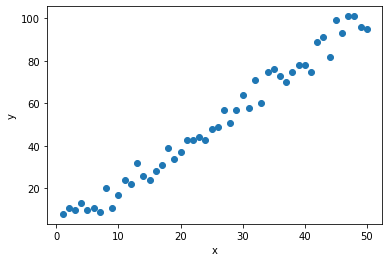

In [42]:
plt.scatter(X.numpy(), y.numpy())
plt.ylabel("y")
plt.xlabel("x")


Note that when we created tensor $X$, we did <em>not</em> pass <tt>requires_grad=True</tt>. This means that $y$ doesn't have a gradient function, and <tt>y.backward()</tt> won't work. Since PyTorch is not tracking operations, it doesn't know the relationship between $X$ and $y$.

**Simple Linear Model**

PyTorch has built-in <tt>nn.Linear()</tt> model preselects weight and bias values at random.


In [24]:
torch.manual_seed(42)

model = nn.Linear(in_features=1, out_features=1, dtype=torch.float)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.7645]], requires_grad=True)
Parameter containing:
tensor([0.8300], requires_grad=True)


Without seeing any data, the model sets a random weight of 0.7645 and a bias of 0.8300.

PyTorch lets us define models as object classes that can store multiple model layers. For now, though, we only need a single <tt>linear</tt> layer.

In [28]:
class SimpleModel(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

<div class="alert alert-info"><strong>NOTE:</strong> The "Linear" model layer used here doesn't really refer to linear regression. Instead, it describes the type of neural network layer employed. Linear layers are also called "fully connected" or "dense" layers. Going forward our models may contain linear layers, convolutional layers, and more.</div>

When <tt>Model</tt> is instantiated, we need to pass in the size (dimensions) of the incoming and outgoing features. For our purposes we'll use (1,1).<br>As above, we can see the initial hyperparameters.

In [29]:
model = SimpleModel(1, 1)

print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

SimpleModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: -0.23427248001098633
Bias:   0.9186112880706787


Since model has just one layer so it is easy to get weight and biases but when model become more complex it is better to iterate over all the model parameters using `model.named_parameters()`

In [33]:
for name, param in model.named_parameters():

    print(name, "\t", param.item())

linear.weight 	 -0.23427248001098633
linear.bias 	 0.9186112880706787


<div class="alert alert-info"><strong>NOTE:</strong> In the above example we had our Model class accept arguments for the number of input and output features.<br><i>For simplicity we can hardcode them into the Model:</i>
         
<tt><font color=green>
class Model(torch.nn.Module):<br>
&nbsp;&nbsp;&nbsp;&nbsp;def \_\_init\_\_(self):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;super().\_\_init\_\_()<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;self.linear = Linear(1,1)<br><br>
model = Model()
</font></tt><br><br>

Alternatively we can use default arguments:

<tt><font color=green>
class Model(torch.nn.Module):<br>
&nbsp;&nbsp;&nbsp;&nbsp;def \_\_init\_\_(self, in_dim=1, out_dim=1):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;super().\_\_init\_\_()<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;self.linear = Linear(in_dim,out_dim)<br><br>
model = Model()<br>
<em>\# or</em><br>
model = Model(i,o)</font></tt>
</div>

**Feed Forward**

Let's create a dummy variable and pass it to `forward` method of `SimpleModel` class.

In [34]:
x = torch.tensor([2], dtype=torch.float32)

#feed forward
print(model.forward(x))

tensor([0.4501], grad_fn=<AddBackward0>)


which is confirmed with $f(x) = (-0.2342724)(2.0)+(0.918) = 0.4501$

So when we created the Linear layers in `SimpleModel` class, PyTorch automatically assigned some weights and bias randomly. Intial model is just like a random estimator since it has not seen the real data.

*Plot the initial model*

In [35]:
x1 = np.array([X.min(),X.max()])
print(x1)

[ 1. 50.]


In [38]:
W1, b1 = model.linear.weight.item(), model.linear.bias.item()

print(f"Initial weight : {W1:.8f}, Initial bias : {b1:.8f}")

y1 = x1*W1 + b1
print(y1)

Initial weight : -0.23427248, Initial bias : 0.91861129
[  0.6843388 -10.795012 ]


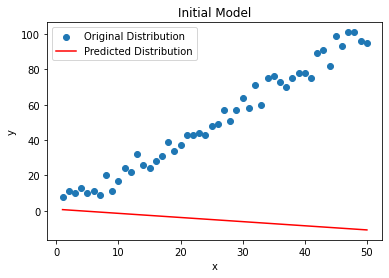

In [46]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Initial Model')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(["Original Distribution","Predicted Distribution"])

Okay so the random model is far worse and we need to train the model over some data to minimize the gap between predicted distribution and original distribution.

Now we need to set loss function so that the model can learn to minimize the loss and hence predicting the distribution close to original distribution.

This is a regression problem so we can use metrics used for regression problems like Mean Squared Error(MSE) etc.

**loss function**
We could write our own function to apply a Mean Squared Error (MSE) that follows<br>

$\begin{align}MSE &= \frac {1} {n} \sum_{i=1}^n {(y_i - \hat y_i)}^2 \\
&= \frac {1} {n} \sum_{i=1}^n {(y_i - (wx_i + b))}^2\end{align}$<br>

Fortunately PyTorch has it built in.<br>
<em>By convention, you'll see the variable name "criterion" used, but feel free to use something like "linear_loss_func" if that's clearer.</em>

In [47]:
criterion = nn.MSELoss()

**Set the optimization**

- Here we'll use <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent'>Stochastic Gradient Descent</a> (SGD) with an applied <a href='https://en.wikipedia.org/wiki/Learning_rate'>learning rate</a> (lr) of 0.001. 
- Recall that the learning rate tells the optimizer how much to adjust each parameter on the next round of calculations. 
- Too large a step and we run the risk of overshooting the minimum, causing the algorithm to diverge. Too small and it will take a long time to converge.

- For more complicated (multivariate) data, you might also consider passing optional <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Momentum'><tt>momentum</tt></a> and <a href='https://en.wikipedia.org/wiki/Tikhonov_regularization'><tt>weight_decay</tt></a> arguments.
-  Momentum allows the algorithm to "roll over" small bumps to avoid local minima that can cause convergence too soon. Weight decay (also called an L2 penalty) applies to biases.

For more information, see <a href='https://pytorch.org/docs/stable/optim.html'><strong><tt>torch.optim</tt></strong></a>

In [48]:
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

**Model's Traning**

Training consists of following steps:


1. Set a reasonably large number of passes<br>
<tt><font color=white>epochs = 50</font></tt><br>
2. Create a list to store loss values. This will let us view our progress afterward.<br>
<tt><font color=white>losses = []</font></tt><br>
<tt><font color=white>for i in range(epochs):</font></tt><br>
3. Bump "i" so that the printed report starts at 1<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;i+=1</font></tt><br>
4. Create a prediction set by running "X" through the current model parameters<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;y_pred = model.forward(X)</font></tt><br>
5. Calculate the loss<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;loss = criterion(y_pred, y)</font></tt><br>
6. Add the loss value to our tracking list<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;losses.append(loss)</font></tt><br>
7. Print the current line of results<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;print(f'epoch: {i:2} loss: {loss.item():10.8f}')</font></tt><br>
8. Gradients accumulate with every backprop. To prevent compounding we need to reset the stored gradient for each new epoch.<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;optimizer.zero_grad()</font></tt><br>
9. Now we can backprop<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;loss.backward()</font></tt><br>
10. Finally, we can update the hyperparameters of our model<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;optimizer.step()</font></tt>



In [49]:
#num of epochs
epochs = 50
#to store losses at each epoch
losses = []

for i in range(epochs):
    #prediction
    y_pred = model.forward(X)
    #loss due to wrong prediction
    loss = criterion(y_pred, y)
    #store the loss
    losses.append(loss.item())
    #print the current weight and bias
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}  weight: {model.linear.weight.item():10.8f}  \
bias: {model.linear.bias.item():10.8f}') 
    #reset stored gradient
    optimizer.zero_grad()
    #back propagation
    loss.backward()
    #update parameters
    optimizer.step()


epoch:  0  loss: 4211.73388672  weight: -0.23427248  bias: 0.91861129
epoch:  1  loss: 2184.10229492  weight: 3.55968428  bias: 1.03080201
epoch:  2  loss: 1137.30786133  weight: 0.83369541  bias: 0.94927651
epoch:  3  loss: 596.88525391  weight: 2.79238725  bias: 1.00693953
epoch:  4  loss: 317.88449097  weight: 1.38506413  bias: 0.96459389
epoch:  5  loss: 173.84628296  weight: 2.39627504  bias: 0.99410641
epoch:  6  loss: 99.48413086  weight: 1.66973126  bias: 0.97198814
epoch:  7  loss: 61.09345245  weight: 2.19179130  bias: 0.98696786
epoch:  8  loss: 41.27357101  weight: 1.81671023  bias: 0.97529256
epoch:  9  loss: 31.04116249  weight: 2.08623886  bias: 0.98276973
epoch: 10  loss: 25.75837898  weight: 1.89260542  bias: 0.97648603
epoch: 11  loss: 23.03093910  weight: 2.03176117  bias: 0.98009020
epoch: 12  loss: 21.62270546  weight: 1.93180275  bias: 0.97659022
epoch: 13  loss: 20.89556694  weight: 2.00365138  bias: 0.97819507
epoch: 14  loss: 20.52002907  weight: 1.95205402  bi

*Plot the loss values over num of epochs*

Text(0.5, 0, 'x')

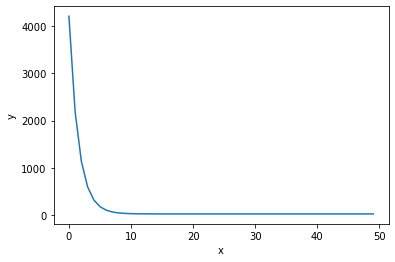

In [50]:
plt.plot(range(epochs), losses)
plt.ylabel("y")
plt.xlabel("x")

Intial losss are quite high as model started learning losses dropped drastically.

**Model's Prediction**

Now we'll derive <tt>y1</tt> from the trained model to plot the most recent best-fit line.

In [51]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(x1)
print(y1)

Current weight: 1.97419441, Current bias: 0.95789522

[ 1. 50.]
[ 2.9320896 99.66761  ]


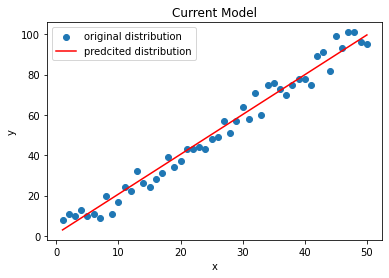

In [52]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(["original distribution", "predcited distribution"])

Trained model is able to predict the underlying distribution with much more clarity and seem almost similar.

**Save the trained model**

Right now <strong><tt>model</tt></strong> has been trained and validated, and seems to correctly predicting the underlying distributions. Let's save this to disk.<br>
The tools we'll use are <a href='https://pytorch.org/docs/stable/torch.html#torch.save'><strong><tt>torch.save()</tt></strong></a> and <a href='https://pytorch.org/docs/stable/torch.html#torch.load'><strong><tt>torch.load()</tt></strong></a><br>

There are two basic ways to save a model.<br>

1. The first saves/loads the `state_dict` (learned parameters) of the model, but not the model class.

The syntax follows:<br>
- <tt><strong>Save:</strong>&nbsp;torch.save(model.state_dict(), PATH)<br><br>
- <strong>Load:</strong>&nbsp;model = TheModelClass(\*args, \*\*kwargs)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.load_state_dict(torch.load(PATH))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.eval()</tt>

2. The second saves the entire model including its class and parameters as a pickle file. Care must be taken if you want to load this into another notebook to make sure all the target data is brought in properly.<br>
<tt><strong>Save:</strong>&nbsp;torch.save(model, PATH)<br><br>
<strong>Load:</strong>&nbsp;model = torch.load(PATH))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.eval()</tt>

In either method, you must call <tt>model.eval()</tt> to set dropout and batch normalization layers to evaluation mode before running inference. Failing to do this will yield inconsistent inference results.

For more information visit https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [54]:
#save the model dict
torch.save(model.state_dict(), "SimpleLinearModel.pt")

**Load the saved model**

In [58]:
new_model = SimpleModel(1, 1)
new_model.load_state_dict(torch.load('SimpleLinearModel.pt'))
new_model.eval()

SimpleModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

**Use it**

In [67]:
y1

array([ 2.9320896, 99.66761  ], dtype=float32)

In [70]:
with torch.no_grad():
    y_val = new_model.forward(torch.tensor([x1[1]]))
    loss = criterion(y_val, torch.tensor([y1[1]]))
print(f'{loss:.8f}')

0.00000000


That's All in PyTorch 101.

Happy Learning!